In [1]:
# MODULE IMPORTS
import sys
sys.path.append('..')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#IMPORT ALL METHODS FOR PROBE
from methods.device_methods import *
from pathfinder import path_finder

In [2]:
#Initialize device name
DEVICE_NAME = "BDOT 1"

#Tweak funny features about the .csv files collected by the 'scope
skiprows = 4 #have to skip the top 4 rows :(
time_key = "Time" #column header for time information
volt_key = "Ampl" #column header for voltage information

#Units of display
v_units = "V" #voltage in volts
t_units = "s" #time in seconds

In [3]:
# SELECT SHOTS FOR ANALYSIS
shot_nos = [1, 2, 3] #user-specified

# Create dictionary of shot paths
shot_path_dict = {}
for shot_no in shot_nos:
    #For each shot number, use the PATHFINDER function to return path to shot data
    shot_path_dict[shot_no] = path_finder(DEVICE_NAME, shot_no)

# HARDCODED- TO BE REMOVED
shot_path_dict = {
    1:"../example_data/data/C1--XX_SCOPE2--00081.csv", 
    2:"../example_data/data/C1--XX_SCOPE2--00081.csv",
    3:"../example_data/data/C1--XX_SCOPE2--00081.csv",
}

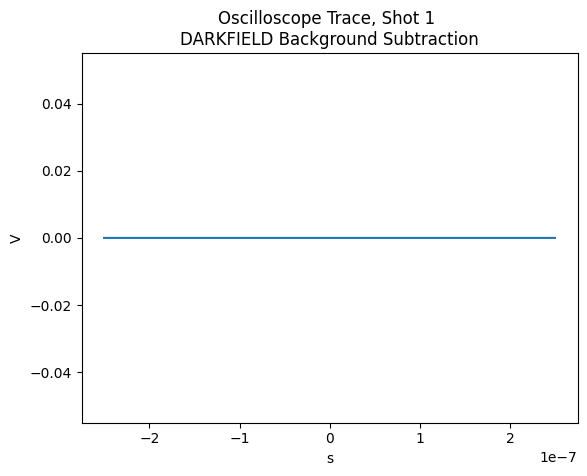

In [4]:
########################################################
# PLOT OSCILLOSCOPE TRACE, WITH OR WITHOUT BKG REMOVAL #
########################################################

#user input: which shot is the raw shot? 
raw_shot_no = 1
bkg_shot_no = 3
bkg_name = "DARKFIELD"
bkg_removal = True

raw_volts = load_scope_voltages(shot_path_dict[raw_shot_no])
bkg_volts = load_scope_voltages(shot_path_dict[bkg_shot_no])
time = load_scope_times(shot_path_dict[raw_shot_no])

if bkg_removal: #perform background subtraction if necessary
    volts = bkg_subtraction(raw_arr=raw_volts, bkg_arr=bkg_volts)
    plt.title(f"Oscilloscope Trace, Shot {raw_shot_no} \n{bkg_name} Background Subtraction")
else:
    volts = raw_volts
    plt.title(f"Raw Oscilloscope Trace for Shot {raw_shot_no}")

# plot the trace
plt.ylabel(v_units) #set correct voltage units
plt.xlabel(t_units) #set correct time units
plt.plot(time, volts)
plt.show()


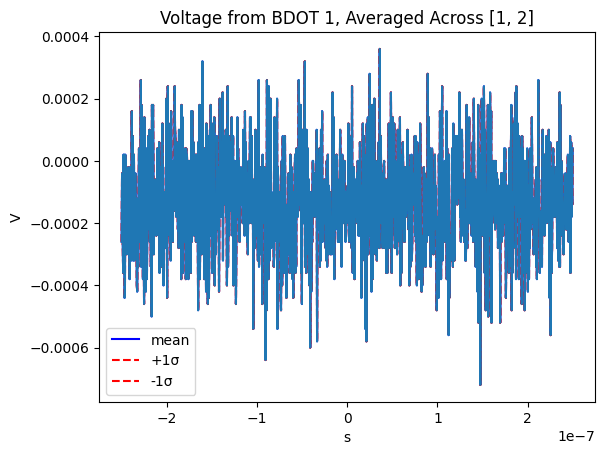

In [5]:
##################################################
# AVERAGE OSCILLOSCOPE TRACES OVER SEVERAL SHOTS #
##################################################

# USER INPUT
shot_nos_to_avg = [1, 2] #Which shot numbers would we like to average over?
voltage_arrays = [load_scope_voltages(shot_path_dict[shot_no]) for shot_no in shot_nos_to_avg]
voltage_means, voltage_stds = arrays_stats(voltage_arrays)

upp_bound = np.add(voltage_means, voltage_stds)
low_bound = np.subtract(voltage_means, voltage_stds)

plt.title(f"Voltage from {DEVICE_NAME}, Averaged Across {shot_nos_to_avg}")
plt.plot(time, voltage_means, color='b', label='mean')
plt.plot(time, upp_bound, ls='--', color='r', label='+1σ')
plt.plot(time, low_bound, ls='--', color='r', label='-1σ')
plt.plot(time, voltage_means)
plt.legend()
plt.ylabel(v_units)
plt.xlabel(t_units)
plt.show() 